# Plotten per Hand mit Matplotlib

Seaborn und Pandas ermöglichen es uns, viele Standardvisualisierungen bequem über vorgefertigte
Funktionen zu erledigen. Aber manchmal müssen wir etwas detaillierter vorgehen.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt  # pyplot ist die "Grundfunktion" von Matplotlib

import seaborn as sns # wir verwenden Seaborn hier nicht, aber mit seaborn sieht alles schöner aus.

In [2]:
a = np.random.random(100)  # Uniform verteile Zufallszahlen ...
b = np.random.randn(100)  # Normalverteile Zufallszahlen ...

Drei Arten, um eine Liste (od. ein Array) von Zahlen zu Z-transformieren:

In [3]:
zscore_a = [(var - np.mean(a)) / np.std(a) for var in a]
zscore_a = (a - a.mean()) / a.std()

from scipy.stats import zscore
zscore_a = zscore(a)
zscore_b = zscore(b)

Unter `plt` (`matplotlib.pyplot`) wohnt eine breite Auswahl von low level-Plotfunktionen, zb. für  Histogramme:

(array([11., 12., 15.,  5.,  7.,  7., 12.,  9., 10., 12.]),
 array([0.00545074, 0.10434413, 0.20323753, 0.30213093, 0.40102432,
        0.49991772, 0.59881112, 0.69770451, 0.79659791, 0.89549131,
        0.99438471]),
 <a list of 10 Patch objects>)

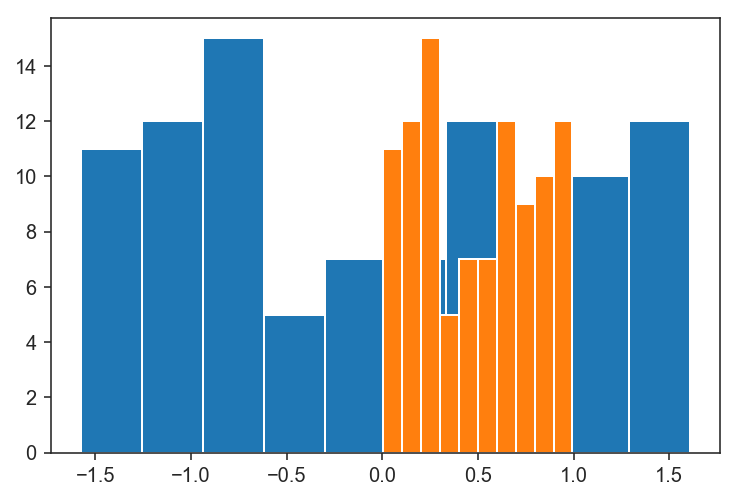

In [4]:
plt.hist(zscore_a)
plt.hist(a)

`plt` plotted beide Male auf die gleiche "Axe", und wechselt die Farbe.

Jetzt mit dem Normalverteilten Array **b**:

(array([ 2.,  3., 10., 17., 26., 17., 14.,  5.,  4.,  2.]),
 array([-2.84252946, -2.25087382, -1.65921818, -1.06756254, -0.4759069 ,
         0.11574874,  0.70740438,  1.29906002,  1.89071566,  2.4823713 ,
         3.07402694]),
 <a list of 10 Patch objects>)

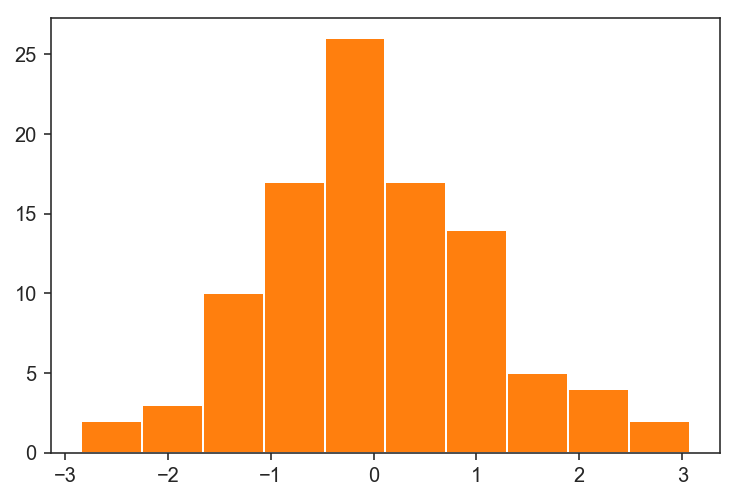

In [5]:
plt.hist(zscore_b)
plt.hist(b)

`plt` kann auch Linien plotten:

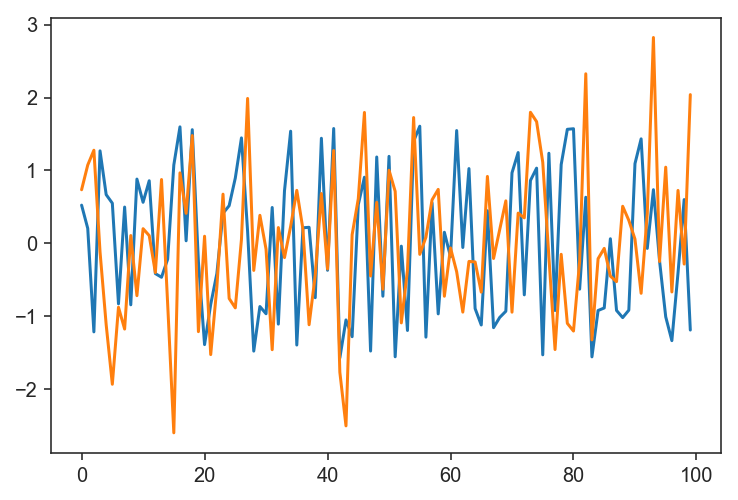

In [6]:
plt.plot(zscore_a)
plt.plot(zscore_b)

... und **a** gegen **b** (nicht sehr sinnvoll hier ...):

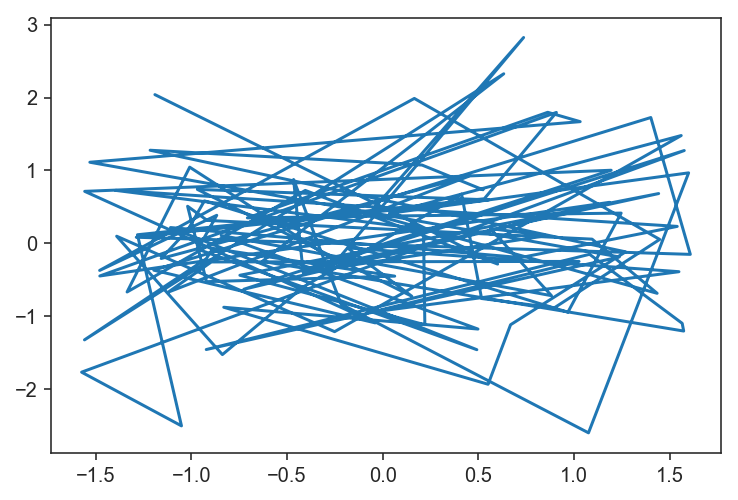

In [7]:
plt.plot(zscore_a, zscore_b)

Sinnvoller:

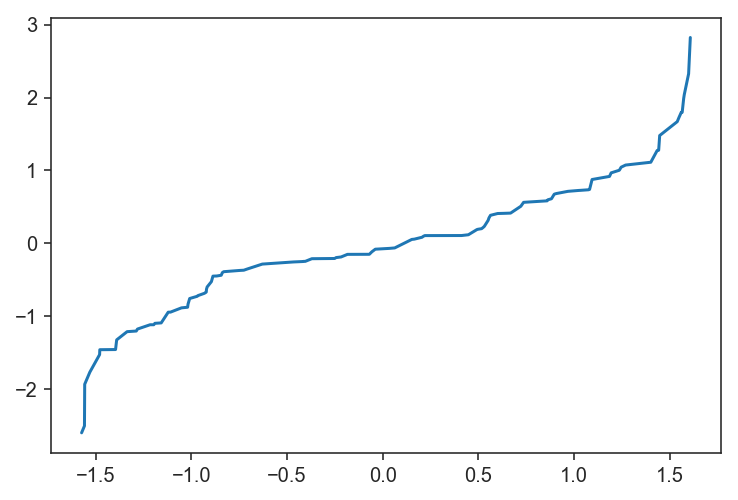

In [8]:
plt.plot(sorted(zscore_a), sorted(zscore_b))  # a gegen b in sortierter Reihenfolge

Mit `plt.plot` lassen sich auch spezifische Linien ziehen:

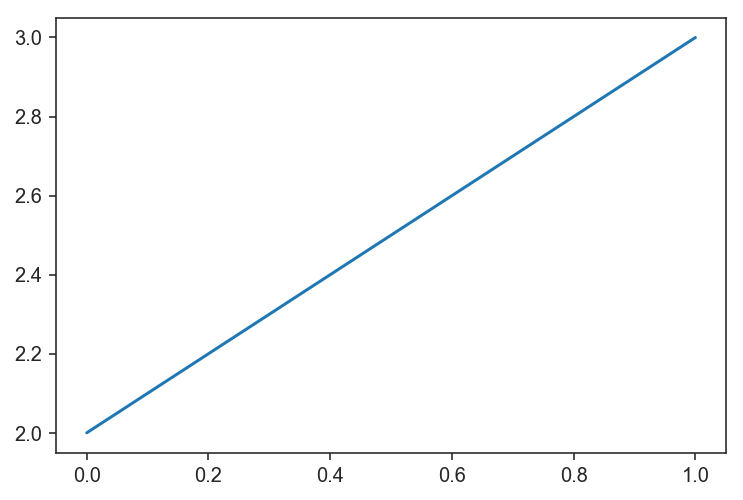

In [9]:
plt.plot((0, 1), (2, 3))

Die `plt`-Funktionen, wie `hist`, `plt` und `scatter`, können gestyled werden, z.b. mit kürzeln oder keyword-Argumenten, und wir können über `plt` auch die Axe stylen:

Text(0.5,0,'Nichts')

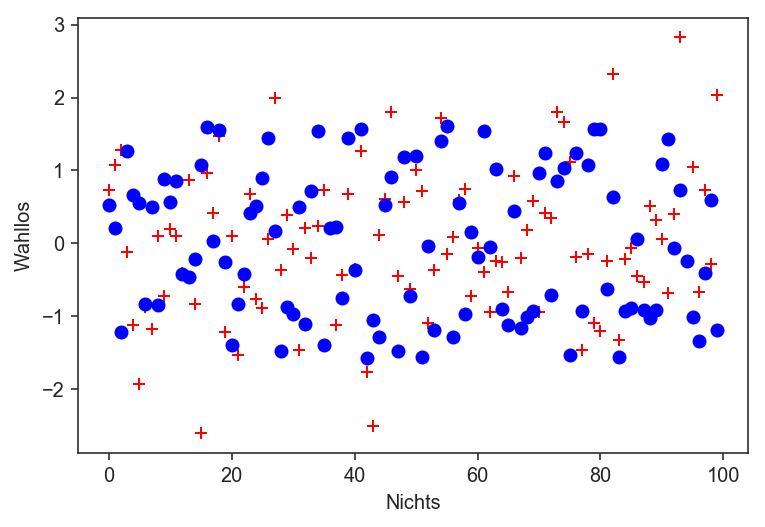

In [10]:
plt.plot(zscore_b, 'r+')  # rotes Kreuz
plt.plot(zscore_a, color="blue", marker="o", linewidth=0)  # blauer Kreis (langform)

plt.ylabel("Wahllos")
plt.xlabel("Nichts")

Für elaboriertere Plots greifen wir nicht direkt auf die Plot-Funktionen unter `plt` zurück, sondern legen erst manuell eine Axe an.
Diese Axe hat dann als methods die Plotfunktionen, die unter `plt` leben, und die resultierenden Plots werden in die entsprechende Axe gezeichnet:

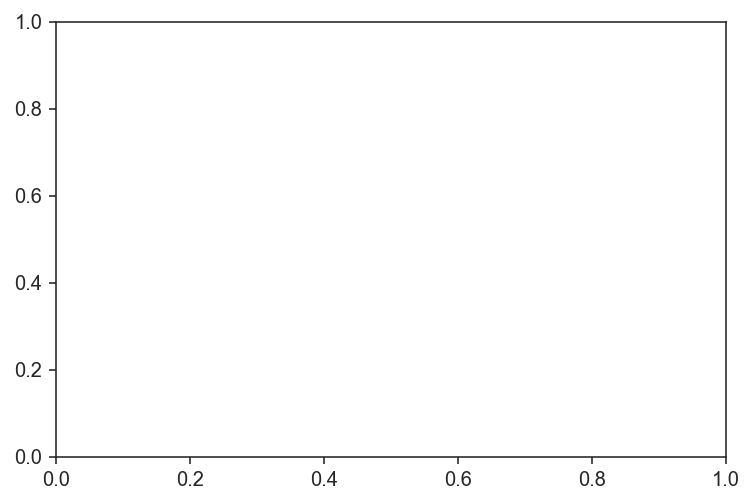

In [11]:
ax = plt.axes()  # erstellt eine leere Axe
ax

Text(0.5,0,'Alles')

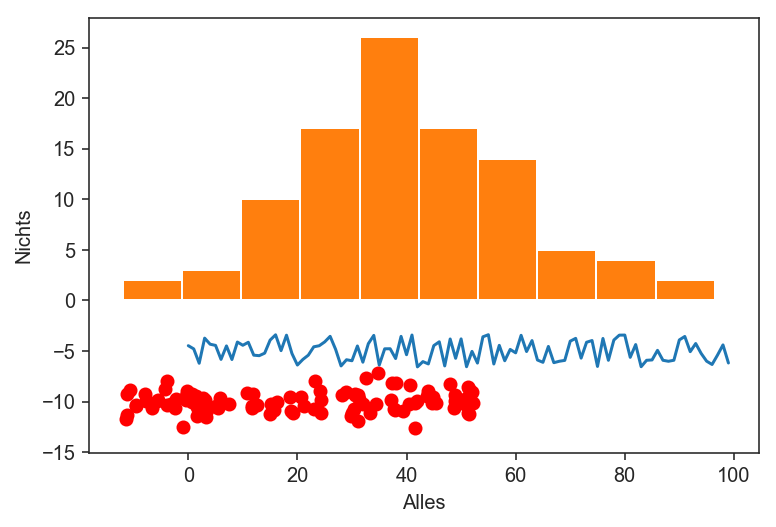

In [12]:
ax = plt.axes()  # leere Axe

ax.plot(zscore_a - 5)  # line plot
ax.hist((zscore_b * 20) + 40)  # histogram (skaliert)
ax.scatter(20 + zscore_a * 20, zscore_b - 10, c="r")  # scatterplot

ax.set_ylabel("Nichts")
ax.set_xlabel("Alles")

Eine Legende lässt sich erstellen, indem für einzelne Plotelemente `label`s festgelegt werden; dann rufen wir `plt.legend() auf.

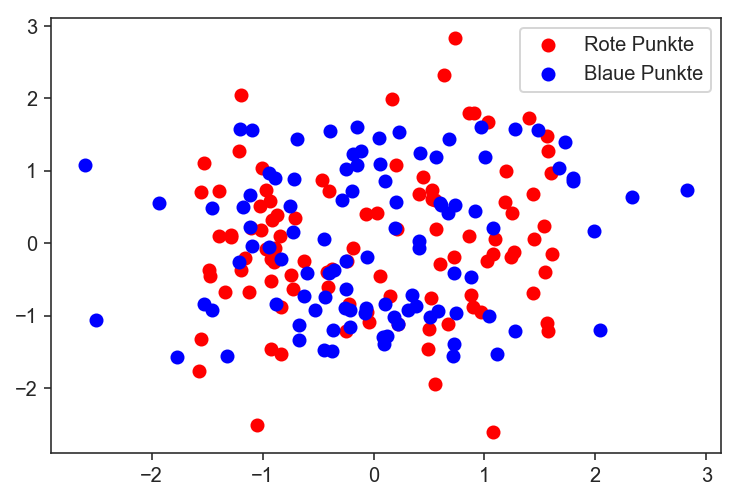

In [13]:
ax = plt.axes()
ax.scatter(zscore_a, zscore_b, color='r', label="Rote Punkte")
ax.scatter(zscore_b, zscore_a, color='b', label="Blaue Punkte")
plt.legend()

Jetzt ein angewandtes Beispiel. Wir suchen einen Bibeltext aus und plotten die häufigsten Worte samt ihrer Anzahl.

In [14]:
text = """1Und Gott segnete Noah und seine Söhne und sprach: Seid fruchtbar und mehrt euch und erfüllt die Erde. 2Furcht und Schrecken vor euch sei über alle Tiere auf Erden und über alle Vögel unter dem Himmel, über alles, was auf dem Erdboden kriecht, und über alle Fische im Meer; in eure Hände seien sie gegeben. 3Alles, was sich regt und lebt, das sei eure Speise; wie das grüne Kraut habe ich's euch alles gegeben. 4Allein eßt das Fleisch nicht, das noch lebt in seinem Blut. 5Auch will ich eures Leibes Blut rächen und will's an allen Tieren rächen und will des Menschen Leben rächen an einem jeglichen Menschen als dem, der sein Bruder ist.

6Wer Menschenblut vergießt, des Blut soll auch durch Menschen vergossen werden; denn Gott hat den Menschen zu seinem Bilde gemacht.

7Seid fruchtbar und mehrt euch und regt euch auf Erden, daß euer viel darauf werden.

8Und Gott sagte zu Noah und seinen Söhnen mit ihm: 9Siehe, ich richte mit euch einen Bund auf und mit eurem Samen nach euch 10und mit allem lebendigen Getier bei euch, an Vögeln, an Vieh und an allen Tieren auf Erden bei euch, von allem, was aus dem Kasten gegangen ist, was für Tiere es sind auf Erden. 11Und richte meinen Bund also mit euch auf, daß hinfort nicht mehr alles Fleisch verderbt werden soll mit dem Wasser der Sintflut, und soll hinfort keine Sintflut mehr kommen, die die Erde verderbe. 12Und Gott sprach: Das ist das Zeichen des Bundes, den ich gemacht habe zwischen mir und euch und allen lebendigen Seelen bei euch hinfort ewiglich: 13Meinen Bogen habe ich gesetzt in die Wolken; der soll das Zeichen sein des Bundes zwischen mir und der Erde. 14Und wenn es kommt, daß ich Wolken über die Erde führe, so soll man meinen Bogen sehen in den Wolken. 15Alsdann will ich gedenken an meinen Bund zwischen mir und euch und allen lebendigen Seelen in allerlei Fleisch, daß nicht mehr hinfort eine Sintflut komme, die alles Fleisch verderbe. 16Darum soll mein Bogen in den Wolken sein, daß ich ihn ansehe und gedenke an den ewigen Bund zwischen Gott und allen lebendigen Seelen in allem Fleisch, das auf Erden ist. 17Und Gott sagte zu Noah: Das sei das Zeichen des Bundes, den ich aufgerichtet habe zwischen mir und allem Fleisch auf Erden.

18Die Söhne Noahs, die aus dem Kasten gingen, sind diese: Sem, Ham und Japheth. Ham aber ist der Vater Kanaans. 19Das sind die drei Söhne Noahs, von denen ist alles Land besetzt.

20Noah aber fing an und ward ein Ackermann und pflanzte Weinberge. 21Und da er von dem Wein trank, ward er trunken und lag in der Hütte aufgedeckt. 22Da nun Ham, Kanaans Vater, sah seines Vaters Blöße, sagte er's seinen beiden Brüdern draußen. 23Da nahmen Sem und Japheth ein Kleid und legten es auf ihrer beider Schultern und gingen rücklings hinzu und deckten des Vaters Blöße zu; und ihr Angesicht war abgewandt, daß sie ihres Vater Blöße nicht sahen. 24Als nun Noah erwachte von seinem Wein und erfuhr, was ihm sein jüngster Sohn getan hatte,

25sprach er: Verflucht sei Kanaan und sei ein Knecht aller Knechte unter seinen Brüdern!

26und sprach weiter: Gelobt sei der HERR, der Gott Sem's; und Kanaan sei sein Knecht!

27Gott breite Japheth aus, und lasse ihn wohnen in den Hütten des Sem; und Kanaan sei sein Knecht!

28Noah aber lebte nach der Sintflut dreihundertfünfzig Jahre, 29daß sein ganzes Alter ward neunhundertundfünfzig Jahre, und starb."
"""

In [15]:
text = text.lower()  # lower space

In [16]:
text = [char for char in text if char in "abcdefghijklmnopqrstuvwxyzäöüß "]
text = "".join(text)
print(text[:100])  # alles außer Buchstaben entfernt (ein 'Filter')

und gott segnete noah und seine söhne und sprach seid fruchtbar und mehrt euch und erfüllt die erde 


In [17]:
words = text.split()  # konvertieren in Worte
print(words[:10])

['und', 'gott', 'segnete', 'noah', 'und', 'seine', 'söhne', 'und', 'sprach', 'seid']


Jetzt zählen wir die Worte. Wir können das manuell erledigen:

In [18]:
counts = {}

for word in words:  # leere Einträge erledigen ... besser wäre, die dict().get - method zu verwenden
    counts[word] = 0

for word in words:
    counts[word] += 1

print(counts)

{'und': 46, 'gott': 7, 'segnete': 1, 'noah': 4, 'seine': 1, 'söhne': 3, 'sprach': 3, 'seid': 1, 'fruchtbar': 2, 'mehrt': 2, 'euch': 13, 'erfüllt': 1, 'die': 8, 'erde': 4, 'furcht': 1, 'schrecken': 1, 'vor': 1, 'sei': 8, 'über': 5, 'alle': 3, 'tiere': 2, 'auf': 10, 'erden': 5, 'vögel': 1, 'unter': 2, 'dem': 7, 'himmel': 1, 'alles': 6, 'was': 5, 'erdboden': 1, 'kriecht': 1, 'fische': 1, 'im': 1, 'meer': 1, 'in': 9, 'eure': 2, 'hände': 1, 'seien': 1, 'sie': 2, 'gegeben': 2, 'sich': 1, 'regt': 2, 'lebt': 2, 'das': 11, 'speise': 1, 'wie': 1, 'grüne': 1, 'kraut': 1, 'habe': 4, 'ichs': 1, 'allein': 1, 'eßt': 1, 'fleisch': 6, 'nicht': 4, 'noch': 1, 'seinem': 3, 'blut': 3, 'auch': 2, 'will': 3, 'ich': 8, 'eures': 1, 'leibes': 1, 'rächen': 3, 'wills': 1, 'an': 8, 'allen': 5, 'tieren': 2, 'des': 7, 'menschen': 4, 'leben': 1, 'einem': 1, 'jeglichen': 1, 'als': 2, 'der': 9, 'sein': 7, 'bruder': 1, 'istwer': 1, 'menschenblut': 1, 'vergießt': 1, 'soll': 6, 'durch': 1, 'vergossen': 1, 'werden': 2, 'de

Wir können aber auch die `count`-Method von Listen verwenden:

In [19]:
counts = {}

for word in words:
    counts[word] = words.count(word)

Oder, ganz bequem:

In [20]:
from collections import Counter
counts = Counter(words)
print(counts)

Counter({'und': 46, 'euch': 13, 'das': 11, 'auf': 10, 'in': 9, 'der': 9, 'die': 8, 'sei': 8, 'ich': 8, 'an': 8, 'gott': 7, 'dem': 7, 'des': 7, 'sein': 7, 'den': 7, 'daß': 7, 'alles': 6, 'fleisch': 6, 'soll': 6, 'mit': 6, 'über': 5, 'erden': 5, 'was': 5, 'allen': 5, 'ist': 5, 'zwischen': 5, 'noah': 4, 'erde': 4, 'habe': 4, 'nicht': 4, 'menschen': 4, 'zu': 4, 'bund': 4, 'allem': 4, 'lebendigen': 4, 'von': 4, 'meinen': 4, 'hinfort': 4, 'sintflut': 4, 'mir': 4, 'wolken': 4, 'söhne': 3, 'sprach': 3, 'alle': 3, 'seinem': 3, 'blut': 3, 'will': 3, 'rächen': 3, 'sagte': 3, 'seinen': 3, 'bei': 3, 'aus': 3, 'es': 3, 'sind': 3, 'mehr': 3, 'zeichen': 3, 'bundes': 3, 'seelen': 3, 'bogen': 3, 'sem': 3, 'ham': 3, 'japheth': 3, 'aber': 3, 'vater': 3, 'ward': 3, 'ein': 3, 'da': 3, 'er': 3, 'blöße': 3, 'kanaan': 3, 'fruchtbar': 2, 'mehrt': 2, 'tiere': 2, 'unter': 2, 'eure': 2, 'sie': 2, 'gegeben': 2, 'regt': 2, 'lebt': 2, 'auch': 2, 'tieren': 2, 'als': 2, 'werden': 2, 'ihm': 2, 'richte': 2, 'nach': 2, 'k

Jetzt suchen wir das Wort, das am häufigsten vorkommt:

In [21]:
# sicherstellen, dass die Worte und Anzahlen in der gleichen Reihenfolge sind
worte = list(counts.keys())
zahlen = [counts[wort] for wort in worte]

In [22]:
max(zahlen)

46

In [23]:
ind = zahlen.index(max(zahlen))

In [24]:
ind

0

In [25]:
worte[ind]

'und'

Ein Histogramm zeigt, dass die meisten Worte nur ein mal vorkommen, und ein paar Worte extrem oft:

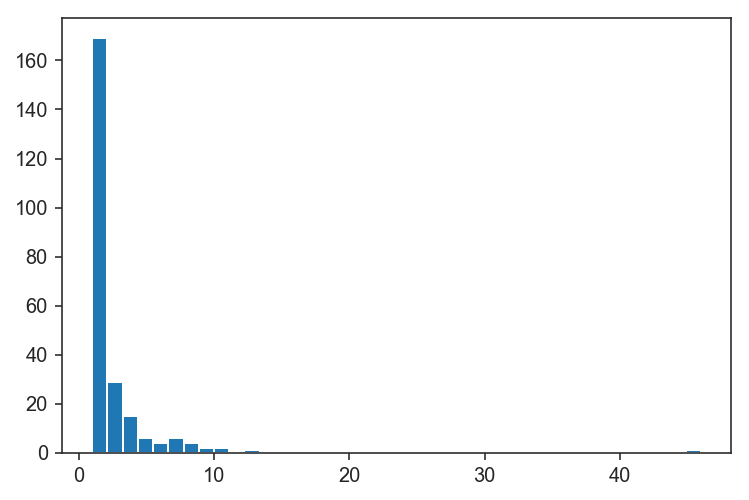

In [26]:
plt.hist(list(counts.values()), bins=40);

Was sind die 4 häufigsten Worte?

In [27]:
most_common_counts = list(reversed(sorted(zahlen)))[:4]  # was macht diese Zeile? Es ist nicht schwer ...
most_common_counts

[46, 13, 11, 10]

Jetzt verwenden wir den gleichen Trick wie oben, um die häufigsten 4 Worte herrauszusuchen:

In [28]:
most_common_words = []

for count in most_common_counts:
    ind = zahlen.index(count)
    most_common_words.append(worte[ind])

most_common_words

['und', 'euch', 'das', 'auf']

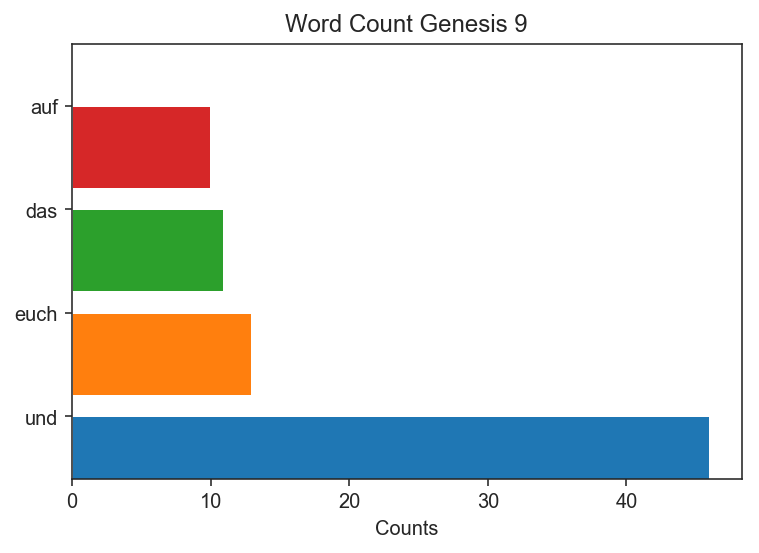

In [29]:
ax = plt.axes()
for y_ax, word in enumerate(most_common_words):
    ax.barh(y_ax, counts[word])  # `barh` plottet einen horizontalen Barplot
    # ii ist die y-Achse: einfach die Zahlen von 0-3
    # für die Länge des Barplots schlagen wir die Zahl im Dictionary `counts` nach

# und jetzt etwas styling ...
ax.set_xlabel("Counts")
ax.set_title("Word Count Genesis 9")

ax.set_yticklabels(most_common_words)  # y-Achsen-Elemente auf die häufigsten Worte setzen
ax.set_yticks(np.arange(4) + .4)  # Zentriert die Positionen der y-Achsen-Elemente

ax.set_ylim((-.2, 4));  # Grenzen der y-Achse

# Hausaufgabe

- Plotten Sie die *Buchstaben*häufigkeit (z.b. als Histogramm)
- Suchen sie den häufigsten *Buchstaben* aus dem Bibeltext

## Bonus

- Plotten Sie wie oben die 5 häufigsten Buchstaben aus dem Bibeltext als Barplot

In [ ]:
text = """1Und Gott segnete Noah und seine Söhne und sprach: Seid fruchtbar und mehrt euch und erfüllt die Erde. 2Furcht und Schrecken vor euch sei über alle Tiere auf Erden und über alle Vögel unter dem Himmel, über alles, was auf dem Erdboden kriecht, und über alle Fische im Meer; in eure Hände seien sie gegeben. 3Alles, was sich regt und lebt, das sei eure Speise; wie das grüne Kraut habe ich's euch alles gegeben. 4Allein eßt das Fleisch nicht, das noch lebt in seinem Blut. 5Auch will ich eures Leibes Blut rächen und will's an allen Tieren rächen und will des Menschen Leben rächen an einem jeglichen Menschen als dem, der sein Bruder ist.

6Wer Menschenblut vergießt, des Blut soll auch durch Menschen vergossen werden; denn Gott hat den Menschen zu seinem Bilde gemacht.

7Seid fruchtbar und mehrt euch und regt euch auf Erden, daß euer viel darauf werden.

8Und Gott sagte zu Noah und seinen Söhnen mit ihm: 9Siehe, ich richte mit euch einen Bund auf und mit eurem Samen nach euch 10und mit allem lebendigen Getier bei euch, an Vögeln, an Vieh und an allen Tieren auf Erden bei euch, von allem, was aus dem Kasten gegangen ist, was für Tiere es sind auf Erden. 11Und richte meinen Bund also mit euch auf, daß hinfort nicht mehr alles Fleisch verderbt werden soll mit dem Wasser der Sintflut, und soll hinfort keine Sintflut mehr kommen, die die Erde verderbe. 12Und Gott sprach: Das ist das Zeichen des Bundes, den ich gemacht habe zwischen mir und euch und allen lebendigen Seelen bei euch hinfort ewiglich: 13Meinen Bogen habe ich gesetzt in die Wolken; der soll das Zeichen sein des Bundes zwischen mir und der Erde. 14Und wenn es kommt, daß ich Wolken über die Erde führe, so soll man meinen Bogen sehen in den Wolken. 15Alsdann will ich gedenken an meinen Bund zwischen mir und euch und allen lebendigen Seelen in allerlei Fleisch, daß nicht mehr hinfort eine Sintflut komme, die alles Fleisch verderbe. 16Darum soll mein Bogen in den Wolken sein, daß ich ihn ansehe und gedenke an den ewigen Bund zwischen Gott und allen lebendigen Seelen in allem Fleisch, das auf Erden ist. 17Und Gott sagte zu Noah: Das sei das Zeichen des Bundes, den ich aufgerichtet habe zwischen mir und allem Fleisch auf Erden.

18Die Söhne Noahs, die aus dem Kasten gingen, sind diese: Sem, Ham und Japheth. Ham aber ist der Vater Kanaans. 19Das sind die drei Söhne Noahs, von denen ist alles Land besetzt.

20Noah aber fing an und ward ein Ackermann und pflanzte Weinberge. 21Und da er von dem Wein trank, ward er trunken und lag in der Hütte aufgedeckt. 22Da nun Ham, Kanaans Vater, sah seines Vaters Blöße, sagte er's seinen beiden Brüdern draußen. 23Da nahmen Sem und Japheth ein Kleid und legten es auf ihrer beider Schultern und gingen rücklings hinzu und deckten des Vaters Blöße zu; und ihr Angesicht war abgewandt, daß sie ihres Vater Blöße nicht sahen. 24Als nun Noah erwachte von seinem Wein und erfuhr, was ihm sein jüngster Sohn getan hatte,

25sprach er: Verflucht sei Kanaan und sei ein Knecht aller Knechte unter seinen Brüdern!

26und sprach weiter: Gelobt sei der HERR, der Gott Sem's; und Kanaan sei sein Knecht!

27Gott breite Japheth aus, und lasse ihn wohnen in den Hütten des Sem; und Kanaan sei sein Knecht!

28Noah aber lebte nach der Sintflut dreihundertfünfzig Jahre, 29daß sein ganzes Alter ward neunhundertundfünfzig Jahre, und starb."
"""

buchstaben = [char for char in text.lower() if char in "abcdefghijklmnopqrstuvwxyzäöüß"]
counts_buchstaben = Counter(...

...